# 9章 最適レギュレータ

In [2]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [3]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [4]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [5]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

## 最適レギュレータ

### 制御対象

In [13]:
A = '0 1; 0 -1'
B = '0; 1'
C = '1 0 ; 0 1'
D = '0; 0'
P = ss(A, B, C, D)
print(P)

A = [[ 0.  1.]
     [ 0. -1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]



### 例9.3

In [14]:
Q = np.array([ [1, 0], [0, 1]])
R = 1

F, X, E = lqr(P.A, P.B, Q, R)
F = -F

print('--- フィードバックゲイン ---')
print(F)
print(-(1/R)*P.B.T*X)
print('--- 閉ループ極 ---')
print(E)
print(np.linalg.eigvals(P.A+P.B*F))

--- フィードバックゲイン ---
[[-1. -1.]]
[[-1. -1.]]
--- 閉ループ極 ---
[-1.+8.820093e-09j -1.-8.820093e-09j]
[-1.+1.49011612e-08j -1.-1.49011612e-08j]


In [15]:
X

matrix([[2., 1.],
        [1., 1.]])

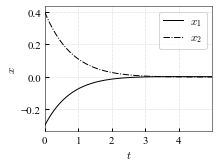

In [16]:
Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

tdata = np.arange(0, 5, 0.01)
xini, tini = initial(Pfb, tdata, [-0.3, 0.4]) #ゼロ入力応答

fig, ax = plt.subplots(figsize=(3, 2.3))

ax.plot(tini, xini[:,0], label = '$x_1$', c='k', lw=1)
ax.plot(tini, xini[:,1], ls = '-.', label = '$x_2$', c='k', lw=1)

plot_set(ax, '$t$', '$x$', 'best')

# fig.savefig("sf_lqr.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [17]:
Q = np.array([ [100, 0], [0, 1]])
R = 1

F, X, E = lqr(P.A, P.B, Q, R)
F = -F

print('--- フィードバックゲイン ---')
print(F)
print(-(1/R)*P.B.T*X)
print('--- 閉ループ極 ---')
print(E)
print(np.linalg.eigvals(P.A+P.B*F))

--- フィードバックゲイン ---
[[-10.          -3.69041576]]
[[-10.          -3.69041576]]
--- 閉ループ極 ---
[-2.345208+2.1213202j -2.345208-2.1213202j]
[-2.34520788+2.12132034j -2.34520788-2.12132034j]


In [18]:
X

matrix([[46.9041576 , 10.        ],
        [10.        ,  3.69041576]])

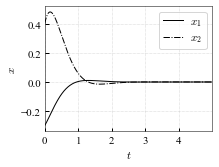

In [19]:
Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

tdata = np.arange(0, 5, 0.01)
xini, tini = initial(Pfb, tdata, [-0.3, 0.4]) #ゼロ入力応答

fig, ax = plt.subplots(figsize=(3, 2.3))

ax.plot(tini, xini[:,0], label = '$x_1$', c='k', lw=1)
ax.plot(tini, xini[:,1], ls = '-.', label = '$x_2$', c='k', lw=1)

plot_set(ax, '$t$', '$x$', 'best')

# fig.savefig("sf_lqr.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### ハミルトン行列

In [20]:
H = np.block([[P.A, -P.B*(1/R)*P.B.T], [-Q, -P.A.T]])
eigH = np.linalg.eigvals(H)
print(eigH)

print('--- ハミルトン行列の安定固有値 ---')
eigH_stable = [ i for i in eigH if i < 0]
print(eigH_stable)

F = -acker(P.A, P.B, eigH_stable)
print('--- フィードバックゲイン ---')
print(F)

[ 2.34520788+2.12132034j  2.34520788-2.12132034j -2.34520788+2.12132034j
 -2.34520788-2.12132034j]
--- ハミルトン行列の安定固有値 ---
[(-2.3452078799117135+2.1213203435596406j), (-2.3452078799117135-2.1213203435596406j)]
--- フィードバックゲイン ---
[[-10.          -3.69041576]]


### 円条件


    3.69 s + 10
-------------------
s^2 + s + 2.776e-17

(inf, 70.74566579604311, nan, 4.2583738912001925)


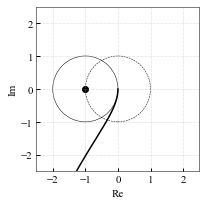

In [21]:
L = ss(P.A, P.B, -F, 0)
print(tf(L))

import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(3, 3))
x, y, w = nyquist(L, logspace(-2,3,1000), plot=False)
ax.plot(x, y, c='k')
# ax.plot(x, -y, ls='--')
ax.scatter(-1, 0, color='k')

ax.grid(ls=':', lw=0.5)
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([-2, -1, 0, 1, 2])


c = patches.Circle(xy=(-1, 0), radius=1, fill=False, ec='k', lw=0.5)
ax.add_patch(c)

c = patches.Circle(xy=(0, 0), radius=1, fill=False, ec='k', ls='--', lw=0.5)
ax.add_patch(c)

print(margin(L))

fig.tight_layout()

#fig.savefig("lqr_nyquist.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 例9.4: 折り返し法

In [12]:
v = 2
print(P.pole())
X, _, _ = care(P.A+v*np.eye(2), P.B, np.zeros([2,2]), R)
#print(X)

[ 0. -1.]


[-3. -4.]
[ 0. -1.]


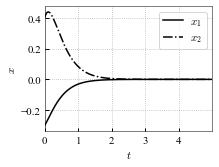

In [13]:
FF = - (1/R)*(P.B.T)*X
Acl = P.A + P.B*FF
Pfb = ss(Acl, P.B, P.C, P.D)
print(Pfb.pole())
print(P.pole())

tdata = np.arange(0, 5, 0.01)
xini, tini = initial(Pfb, tdata, [-0.3, 0.4]) #ゼロ入力応答

fig, ax = plt.subplots(figsize=(3, 2.3))

ax.plot(tini, xini[:,0], label = '$x_1$', c='k')
ax.plot(tini, xini[:,1], ls = '-.', label = '$x_2$', c='k')

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.grid(ls=':')
ax.legend()


6 s + 12
--------
s^2 + s



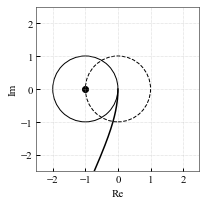

In [14]:
L = ss(P.A, P.B, -FF, 0)
print(tf(L))

import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(3, 3))
x, y, w = nyquist(L, logspace(-2,3,1000), plot=False)
ax.plot(x, y, c='k')
# ax.plot(x, -y, ls='--')
ax.scatter(-1, 0, color='k')

ax.grid(ls=':', lw=0.5)
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([-2, -1, 0, 1, 2])


c = patches.Circle(xy=(-1, 0), radius=1, fill=False, ec='k')
ax.add_patch(c)

c = patches.Circle(xy=(0, 0), radius=1, fill=False, ec='k', ls='--')
ax.add_patch(c)

fig.tight_layout()

[-2.345208+2.1213202j -2.345208-2.1213202j]


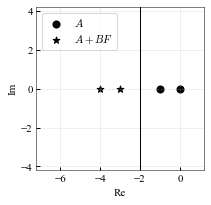

In [15]:
fig, ax = plt.subplots(figsize=(3, 3))

P1pole = pole(P)
P2pole = pole(Pfb)

Q = [ [100, 0], [0, 1]]
R = 1
_, _, P3pole = lqr(P.A, P.B, Q, R)

print(P3pole)

ax.scatter(P1pole.real, P1pole.imag, s=50, marker='o',label='$A$', color='k')
ax.scatter(P2pole.real, P2pole.imag, s=50, marker='*',label='$A+BF$', color='k')
#ax.scatter(P3pole.real, P3pole.imag, s=50, marker='x',label='$A+BF$', color='k')

ax.vlines(-v, -5, 5, color='k', lw=1)

#ydata = np.arange(-5,5,0.1)
#xdata = -np.abs(ydata)
#ax.plot(xdata, ydata)

ax.set_xlim(-7.2,1.2)
ax.set_ylim(-4.2,4.2)
plot_set(ax, 'Re', 'Im', 2)

#fig.savefig("lqr_pole_assignment.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 章末問題

In [23]:
#章末問題４
A = '0 1; 1 1'
B = '0; 1'
C = '1 0 ; 0 1'
D = '0; 0'
P = ss(A, B, C, D)

Q = np.array([ [3, 0], [0, 2]])
R = 1

F, X, E = lqr(P.A, P.B, Q, R)
F = -F

print('--- フィードバックゲイン ---')
print(F)
print(-(1/R)*P.B.T*X)
print('--- 閉ループ極 ---')
print(E)
print(np.linalg.eigvals(P.A+P.B*F))

--- フィードバックゲイン ---
[[-3. -4.]]
[[-3. -4.]]
--- 閉ループ極 ---
[-2.+0.j -1.+0.j]
[-1. -2.]


In [24]:
X

matrix([[5., 3.],
        [3., 4.]])

In [46]:
#章末問題８
A = '0 1; 0 0'
B = '0; 1'
C = '1 0 ; 0 3'
D = '0; 0'
P = ss(A, B, C, D)

Q = P.C.T * P.C
R = 1

F, X, E = lqr(P.A, P.B, Q, R)
F = -F

print('--- フィードバックゲイン ---')
print(F)
print(-(1/R)*P.B.T*X)
print('--- 閉ループ極 ---')
print(E)
print(np.linalg.eigvals(P.A+P.B*F))

--- フィードバックゲイン ---
[[-1.         -3.31662479]]
[[-1.         -3.31662479]]
--- 閉ループ極 ---
[-2.981188  +0.j -0.33543673+0.j]
[-0.33543674 -2.98118805]


In [47]:
X

matrix([[3.31662479, 1.        ],
        [1.        , 3.31662479]])

In [26]:
np.sqrt(11)

3.3166247903554

In [49]:
(-np.sqrt(11)+np.sqrt(7))/2

-0.33543673964540455

In [50]:
(-np.sqrt(11)-np.sqrt(7))/2

-2.9811880507099953

In [42]:
#章末問題９
A = '1 1; 0 -5'
B = '0; 1'
C = '1 0 ; 0 1'
D = '0; 0'
P = ss(A, B, C, D)

v = 3
R = 1

X, _, _ = care(P.A+v*np.eye(2), P.B, np.zeros([2,2]), R)
X

matrix([[288.,  48.],
        [ 48.,   8.]])

In [44]:
FF = - (1/R)*(P.B.T)*X
print(FF)

Acl = P.A + P.B*FF
Pfb = ss(Acl, P.B, P.C, P.D)
print(Pfb.pole())
print(P.pole())

[[-48.  -8.]]
[-5. -7.]
[ 1. -5.]


## 付録：最適極

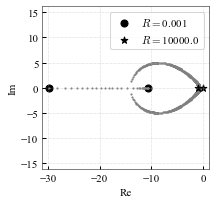

In [95]:
Q = [ [100, 0], [0, 1]]
R = 0.001

_, _, E = lqr(P.A, P.B, Q, R)

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(E.real, E.imag, s=50, marker='o',label='$R=$'+str(R), color='k')

for i in np.arange(1,10,0.1):
    _, _, E = lqr(P.A, P.B, Q, R*i)
    ax.scatter(E.real, E.imag, s=5, marker='.', color='gray')
for i in np.arange(10,100,1):
    _, _, E = lqr(P.A, P.B, Q, R*i)
    ax.scatter(E.real, E.imag, s=5, marker='.', color='gray')
for i in np.arange(100,1000,10):
    _, _, E = lqr(P.A, P.B, Q, R*i)
    ax.scatter(E.real, E.imag, s=5, marker='.', color='gray')
for i in np.arange(1000,100000,100):
    _, _, E = lqr(P.A, P.B, Q, R*i)
    ax.scatter(E.real, E.imag, s=5, marker='.', color='gray')

_, _, E = lqr(P.A, P.B, Q, R*10000000)
ax.scatter(E.real, E.imag, s=50, marker='*',label='$R=$'+str(R*10000000), color='k') 
ax.set_xlim(-31.2,1.2)
ax.set_ylim(-16.2,16.2)
plot_set(ax, 'Re', 'Im', 'best')

#fig.savefig("lqr_opt_pole_locus.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [181]:
_, _, E = lqr(P.A, P.B, Q, R)
print(E)

[-10.60926 +0.j -29.806772+0.j]


In [617]:
margin(L)

(2.7755575615628168e-18, 70.74566579604317, 0.0, 4.258373891200274)